In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# Read the file bluegills.txt. The seperator is tab
data = pd.read_csv('../input/bluegills.txt', sep='\t')
data.head()

age  length
0    1      67
1    1      62
2    2     109
3    2      83
4    2      91

In [13]:
# Give the dimensions of the dataset
data.shape

(78, 2)

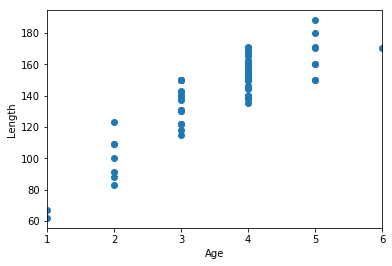

In [14]:
# Plot the length vs the age
plt.scatter(data['age'], data['length'])
plt.xlim([1, 6])
plt.xlabel('Age')
plt.ylabel('Length')

In [15]:
# First use Simple Linear Regression to predict the length

In [16]:
from sklearn.model_selection import train_test_split
X = data.drop('length',axis=1)
y = data['length']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [17]:
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [18]:
# First we are using LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the slope:
print("Slope")
print(model.coef_)
print()

Intercept
60.17877492877494

Slope
[22.69871795]



In [19]:
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 10.802261396011394

Mean Squared Error: 169.69751786460742

Root Mean Squared Error: 13.026799985591527

R square: 0.5983870266616245



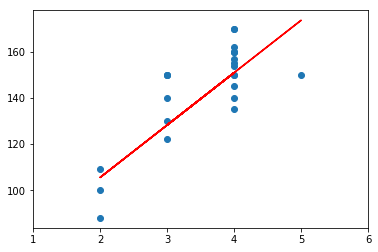

In [20]:
# Plot the dataset length vs age and the line
# First calculate the minimum and the maximumvalue for age

plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red')
plt.xlim([1, 6])
plt.show()

In [21]:
# Now we are using Polynomial Regression. 
# This is still LinearRegression because the coefficients/weights associated with the features are still linear

In [22]:
poly = PolynomialFeatures(degree=8)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the coefficients:
print("Coefficients")
print(model.coef_)
print()


Intercept
50.40085065859628

Coefficients
[ 0.          2.77454139  5.5994021   6.39362881  2.32881321 -4.33722329
  1.55517297 -0.22726616  0.01208031]



In [23]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

mean = data['length'].mean()
print ('Mean: ' + str(mean))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 9.540589811421835

Mean Squared Error: 127.94208141339887

Root Mean Squared Error: 11.311148545280398

Mean: 143.60256410256412

R square: 0.697207122542997



In [24]:
# Calculate the result of the polynomial for a specific value of x
def p(x):
    result = model.intercept_
    for i in range(0, len(model.coef_)):
        result += model.coef_[i] * x**i 
    return result

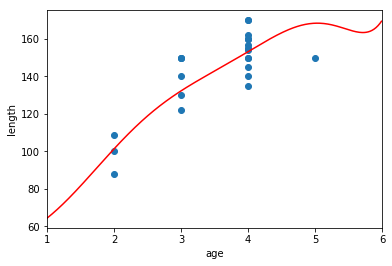

In [25]:
# Plot the dataset
plt.scatter(X_test, y_test)
plt.xlim([1, 6])
plt.xlabel('age')
plt.ylabel('length')

# Plot the polynomial
t1 = np.arange(1, 6, 0.01)
plt.plot(t1, p(t1), color='red')
plt.show()


In [26]:
# The Root Mean Squared Error is smaller for Polynomial Regression

In [27]:
# Use a for loop to create a model voor polynomials of degree = 1 .. 5 and to write out the root mean squared error

In [28]:
for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)
    X_train_transform = poly.fit_transform(X_train)
    X_test_transform = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    y_predict = model.predict(X_test_transform)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
    print('Root Mean Squared Error for i = ' + str(i) + ' is ' + str(RMSE))
    print()

Root Mean Squared Error for i = 1 is 13.026799985591532

Root Mean Squared Error for i = 2 is 11.305398368903134

Root Mean Squared Error for i = 3 is 11.32481635835135

Root Mean Squared Error for i = 4 is 11.406563548998381

Root Mean Squared Error for i = 5 is 11.311148545293351

Root Mean Squared Error for i = 6 is 11.311148545285077

Root Mean Squared Error for i = 7 is 11.311148545285313

Root Mean Squared Error for i = 8 is 11.311148545280398

Root Mean Squared Error for i = 9 is 11.31114854531666

Root Mean Squared Error for i = 10 is 11.311148545191575



Root Mean Squared Error for i = 1 is 13.238071254228508

Root Mean Squared Error for i = 2 is 11.2745441921537

Root Mean Squared Error for i = 3 is 11.485820234624317

Root Mean Squared Error for i = 4 is 11.77480979480672

Root Mean Squared Error for i = 5 is 11.834032989007916

